In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
output_path = './training_data.csv'
df = pd.read_csv(output_path)

X = df[['initial_speed', 'initial_angle']].values
Y = df[['max_range','max_height']].values  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import Callback

model = Sequential([
    Dense(6, activation='relu', input_shape=(2,)), 
    Dense(6, activation='relu'),  
    Dense(2)  
])

In [4]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['accuracy'])

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=200, batch_size=4, validation_split=0.1)

Epoch 1/200
170/170 [==============================] - 1s 3ms/step - loss: 30295.1914 - accuracy: 0.8279 - val_loss: 17753.0684 - val_accuracy: 0.9079
Epoch 2/200
170/170 [==============================] - 0s 2ms/step - loss: 14781.6016 - accuracy: 0.8294 - val_loss: 14254.0645 - val_accuracy: 0.9079
Epoch 3/200
170/170 [==============================] - 0s 2ms/step - loss: 12168.4492 - accuracy: 0.8265 - val_loss: 11241.9521 - val_accuracy: 0.8421
Epoch 4/200
170/170 [==============================] - 0s 2ms/step - loss: 10207.3613 - accuracy: 0.8132 - val_loss: 9408.3887 - val_accuracy: 0.9079
Epoch 5/200
170/170 [==============================] - 0s 2ms/step - loss: 8665.6953 - accuracy: 0.8294 - val_loss: 7935.9302 - val_accuracy: 0.9079
Epoch 6/200
170/170 [==============================] - 0s 2ms/step - loss: 7785.6987 - accuracy: 0.8294 - val_loss: 7071.3149 - val_accuracy: 0.9079
Epoch 7/200
170/170 [==============================] - 0s 2ms/step - loss: 7407.7671 - accuracy: 0.

6/6 [==============================] - 0s 2ms/step - loss: 2135.3159 - accuracy: 0.8571


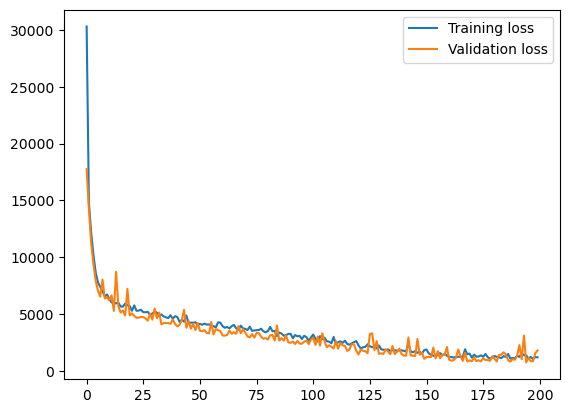

In [8]:
# model.evaluate(x_test, y_test)
loss = model.evaluate(x_test, y_test)

# 繪製訓練歷史
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

6/6 [==============================] - 0s 2ms/step


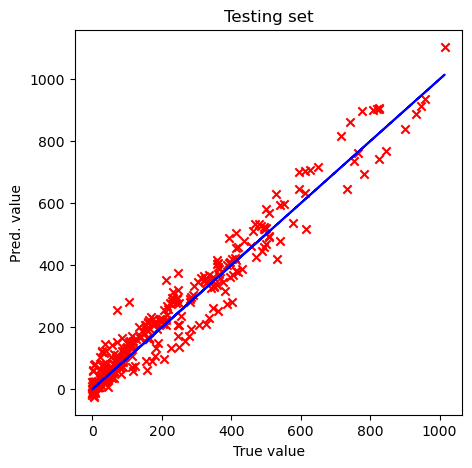

24/24 [==============================] - 0s 1ms/step


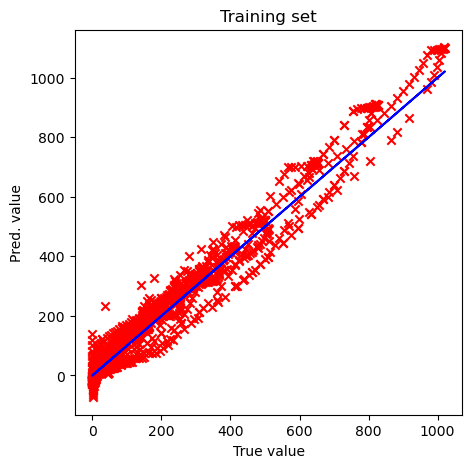

In [9]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


24/24 [==============================] - 0s 1ms/step


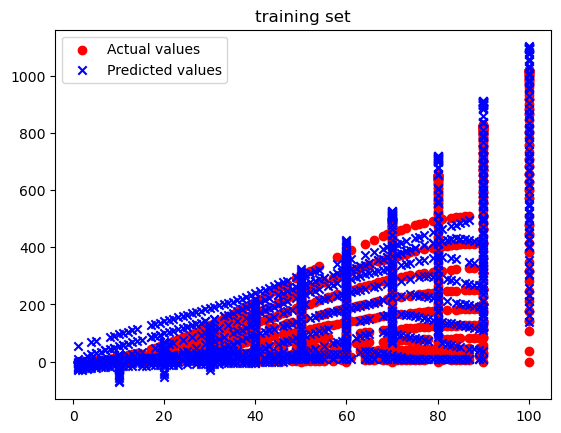

6/6 [==============================] - 0s 2ms/step


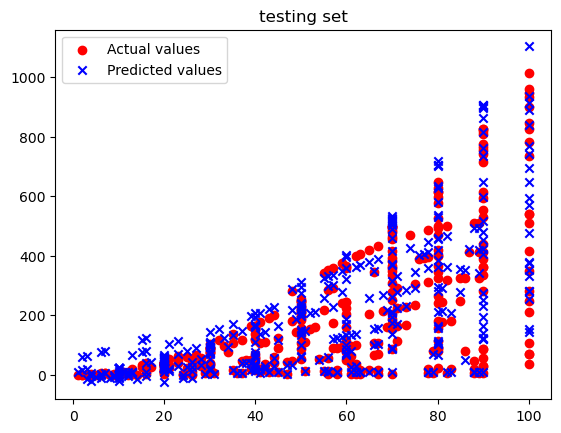

In [10]:
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train, color='red', label='Actual values')
plt.scatter(x_train, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()


y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color='red', label='Actual values')
plt.scatter(x_test, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import r2_score
y_pred = np.squeeze(y_pred)
r2 = r2_score(y_pred,y_test)
print(r2)

0.9539683488756232


In [12]:
>>> from sklearn.datasets import make_regression
>>> from sklearn.feature_selection import r_regression

y_pred = model.predict(x_test)
Pearson_test = r_regression(y_test.reshape(-1,1),y_pred.ravel())
y_pred = model.predict(x_train)
Pearson_train = r_regression(y_train.reshape(-1,1),y_pred.ravel())

print(Pearson_test,Pearson_train)

24/24 [==============================] - 0s 1ms/step
[0.97942773] [0.98456453]


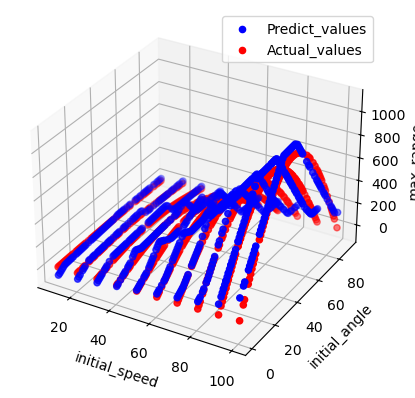

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


x = x_train[:,0]
y = x_train[:,1]
z = y_pred[:,0]


fig = plt.figure()


ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, color='blue',label='Predict_values')
x = x_train[:,0]
y = x_train[:,1]
z = y_train[:,0]
ax.scatter(x, y, z, color='red',label='Actual_values')

ax.set_xlabel('initial_speed')
ax.set_ylabel('initial_angle')
ax.set_zlabel('max_range')
plt.legend()


plt.show()

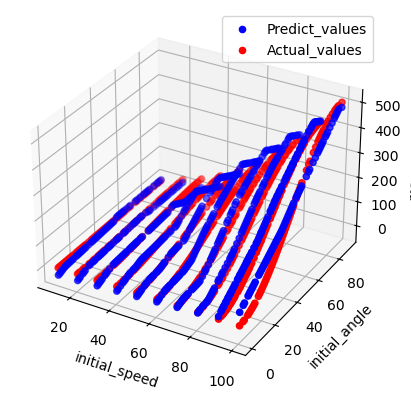

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = x_train[:,0]
y = x_train[:,1]
z = y_pred[:,1]

fig = plt.figure()


ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, color='blue',label='Predict_values')
x = x_train[:,0]
y = x_train[:,1]
z = y_train[:,1]
ax.scatter(x, y, z, color='red',label='Actual_values')

ax.set_xlabel('initial_speed')
ax.set_ylabel('initial_angle')
ax.set_zlabel('max_range')

plt.legend()

plt.show()